In [1]:
from dataclasses import dataclass
from pathlib import Path

import pandas as pd

from mmvae_hub.base.experiment_vis.utils import *
from mmvae_hub.base.utils.MongoDB import MongoDatabase
from mmvae_hub.base.utils.flags_utils import get_config_path
from mmvae_hub.base.utils.utils import dict2pyobject, json2dict

[11:32:48 CEST] Log file: /usr/local/var/logs/mmvae_hub/UTC-20210519-093248.log


In [2]:
exp_db = MongoDatabase(training=False)
experiments = exp_db.connect()

In [3]:
print('There are currently ', experiments.count_documents({}), 'experiments in the database.')

There are currently  31 experiments in the database.


In [4]:
df = make_experiments_dataframe(experiments)

In [6]:
show_cols = ['weighted_mixture','score', 'method', 'end_epoch', 'class_dim', 'beta', '_id', 'score_lr', 'score_gen','score_prd', 'num_mods']
df[show_cols].sort_values(by=['score'], ascending=False)

,weighted_mixture,score,method,end_epoch,class_dim,beta,_id,score_lr,score_gen,score_prd,num_mods
0,NaN,15.368883,joint_elbo,299,64.0,2.5,polymnist_joint_elbo_2021_05_04_09_21_34_487039,5.252283,10.116600,0.000000,3.0
18,NaN,13.342450,moe,299,512.0,2.5,polymnist_moe_2021_05_16_08_11_11_173474,4.227050,9.115400,0.433640,3.0
4,NaN,11.739267,joint_elbo,299,64.0,0.5,polymnist_joint_elbo_2021_05_08_05_21_05_683057,3.932350,7.806917,0.611546,3.0
15,NaN,11.271117,planar_mixture_5,299,512.0,2.5,polymnist_planar_mixture_2021_05_13_15_20_43_7...,1.477533,9.793583,2.595059,3.0
13,NaN,11.132117,planar_mixture_5,299,512.0,2.5,polymnist_planar_mixture_2021_05_12_11_38_58_1...,1.349800,9.782317,1.495992,3.0
5,NaN,11.092400,moe,299,128.0,0.5,polymnist_moe_2021_05_09_01_46_10_858142,3.572933,7.519467,0.332367,3.0
2,NaN,9.968633,joint_elbo,299,32.0,0.5,polymnist_joint_elbo_2021_05_06_12_59_58_785343,3.239317,6.729317,0.312330,3.0
3,NaN,7.705983,moe,299,64.0,0.5,polymnist_moe_2021_05_07_09_09_37_528857,2.489417,5.216567,0.192170,3.0
1,NaN,6.143800,moe,299,32.0,0.5,polymnist_moe_2021_05_05_17_04_47_279351,1.717367,4.426433,0.180041,3.0
22,NaN,4.762517,planar_mixture_16,299,512.0,2.5,polymnist_planar_mixture_2021_05_18_12_13_01_9...,0.719617,4.042900,0.176274,3.0


Generate samples with the model that has the highest score.

In [6]:
# best_score_id = df[df.score == df.score.max()]._id.item()
# best_score_id = 'polymnist_moe_2021_05_16_08_11_11_173474'
best_score_id = 'polymnist_moe_2021_05_11_16_37_17_515090'
print(best_score_id)
experiments_database = MongoDatabase(training=False, _id=best_score_id)
experiment_dict = experiments_database.get_experiment_dict()
config = json2dict(get_config_path())
experiment_flags = experiment_dict['flags']

for key in config:
    if key in ['dir_experiment', 'dir_clf', 'dir_data']:
        experiment_flags[key] = config[key]

experiment_flags['use_clf'] = False
experiment_flags['device'] = 'cpu'
experiment_flags['weighted_mixture'] = False
experiment_flags['save_figure'] = False



polymnist_moe_2021_05_11_16_37_17_515090


MOEMMVae()


[09:29:23 CEST] Loading networks from database for model MOEMMVae().


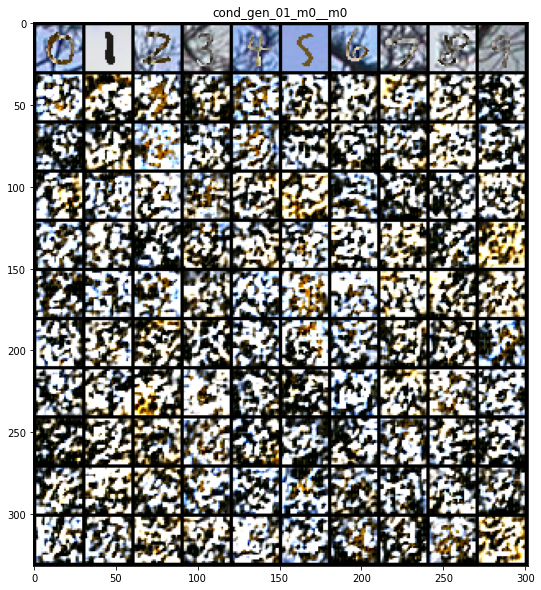

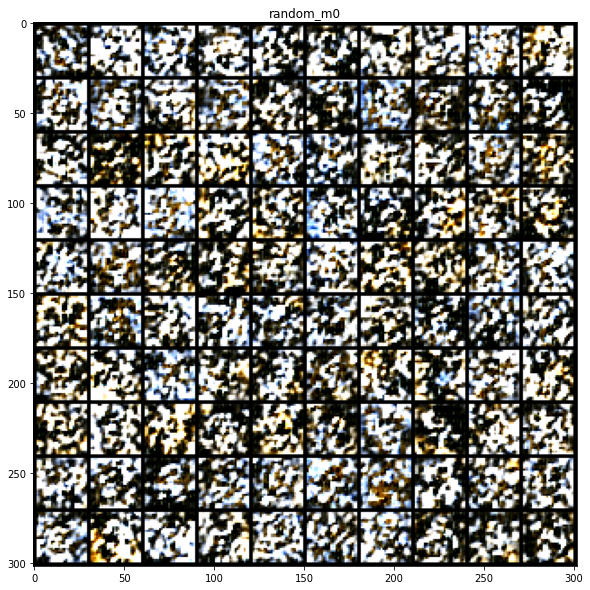

In [7]:
show_generated_figs(flags=dict2pyobject(experiment_flags))